# How to scale Amplitudes in FFT calculated spectrum

In [675]:
# Copyright (C) 2020 Danny Schneider
##
## This program is free software; you can redistribute it and/or
## modify it under the terms of the GNU General Public
## License as published by the Free Software Foundation;
## either version 2, or (at your option) any later version.
##
## Octave is distributed in the hope that it will be useful,
## but WITHOUT ANY WARRANTY; without even the implied
## warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR
## PURPOSE.  See the GNU General Public License for more
## details.
##
## You should have received a copy of the GNU General Public
## License along with Octave; see the file COPYING.  If not,
## write to the Free Software Foundation, 59 Temple Place -
## Suite 330, Boston, MA 02111-1307, USA.

### some octave mngt stuff...

In [676]:
clear all;
close all;

In [677]:
fig=1;

## public functions

In [678]:
%%file my_scale_signal.m

function result=my_scale_signal(data,newmax)
  newmax=abs(newmax);                   # Remove sign of newmax
  signal_min=abs(min(data));            # Find absolut minimum
  signal_max=abs(max(data));            # Find absolut maximum
  factor=max([signal_min,signal_max]);  # choose scaling factor 
  result=(data .* newmax) ./ factor;    # scale the data
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_scale_signal.m'.


In [679]:
%%file my_normalize.m

# rescale to max(abs(max(data)),abs(min(data)))=1
function result=my_normalize(data)
  result=my_scale_signal(data,1);
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_normalize.m'.


In [680]:
%%file get_mean.m

function res=get_mean(data)
  res=0;
  samples=length(data);
  if(samples>0)
    for(ii=1:1:length(data))
      res = res .+ (data(:,ii)./samples);
    endfor
  endif
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/get_mean.m'.


In [681]:
%%file get_mean2.m

function res=get_mean2(data)
  res=0;
  samples=length(data);
  if(samples>0)
    a=data(1);
    if(samples>1)
      for(ii=2:1:length(data))
        b=data(:,ii);
        trapez=a .+ ((b.-a)./2);
        if(b>a)
          res = res .+ trapez;
        else
          res = res .- trapez;
        endif
      endfor
    else
      res=a;
    endif    
  endif
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/get_mean2.m'.


In [682]:
%%file get_movavrg.m

function res=get_movavrg(data)  
  samples=length(data);
  res=zeros(1,samples);
  if(samples>0)
    a=data(1);
    if(samples>1)
      for(ii=2:1:length(data))
        b=data(:,ii);        
        res(:,ii) = a .+ ((b.-a)./2);
      endfor
    else
      res(:,1)=a;
    endif    
  endif
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/get_movavrg.m'.


In [683]:
%%file my_is_near_number.m

function [result] = my_is_near_number(t,n,e)
  test   = abs(abs(t).-abs(n));
  result = (test<=abs(e));
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_is_near_number.m'.


In [684]:
%%file my_precise_result.m

function result = my_precise_result(data)
    test = 0;
    local_e=0.1e-6;
    result = data;
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
    test = 1;
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
#-----
    test = pi;
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif

    test = sqrt(2);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
#-----
    test = sin(pi);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
    test = sin(pi/2);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
        test = sin(pi/3);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
#-----
    test = cos(pi);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
    test = cos(pi/2);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
    test = cos(pi/3);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
#-----
    test = tan(pi);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
    test = tan(pi/2);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
    test = tan(pi/3);
    if(my_is_near_number(result,test,local_e))
        result = test;
    endif
    return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_precise_result.m'.


In [685]:
%%file my_standarddeviation.m

function result = my_standarddeviation(data)
  ##Todo: check data to be 1dim
  nos = length(data);

  #mean = sum(data)./nos;
  mean = get_mean(data);
  #get_mean2(data)
  tmp1 = (data.-mean).^2;
  tmp2 = sum(tmp1)./(nos.-1);

  result = sqrt(tmp2);
  result = my_precise_result(result);
  return;
endfunfction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_standarddeviation.m'.


the root-mean-square: DC equivalent of an AC Signal [data]

In [686]:
%%file my_rootmeansquare.m

function result=my_rootmeansquare(data)
  result = sqrt(sum(data.^2)/length(data));
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_rootmeansquare.m'.


In [687]:
%%file tospectrum.m

function spectrum = tospectrum(timedomain_data)
  tmp = fft(timedomain_data);
  #(1,1:(length(timedomain_data)./2));
  noiseshift = -10*log(length(tmp));
  #noiseshift=0;
  spectrum = 20.*log(abs(tmp)) .+ noiseshift;
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/tospectrum.m'.


Theoretical Noise Floor to best Signal

In [688]:
%%file snr_expected.m

function res = snr_expected(bits)
  res = 6.022*bits+1.76;
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/snr_expected.m'.


Calculate position of hamonics

In [689]:
%%file harmonic_pos_calc.m

function pos = harmonic_pos_calc(nos,fs,fsig,harmonic)
  f1pos = nos./(fs./2.0).*fsig;
  vpos = f1pos.*(1.+harmonic);
  mirror = floor(vpos/nos);
  even = mod(mirror,2.0);
  rest = mod(vpos,nos);
  if(even==0)
    pos=round(rest);
  else
    pos=round(nos-rest);
  endif
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/harmonic_pos_calc.m'.


Estimate Amplitude of hamonic

In [690]:
%%file harmonic_extract.m

function res=harmonic_extract(data,pos,noiseval)
  lpos=pos;
  rpos=pos;
  if(pos>0)
    if(pos<length(data))
      while(data(lpos)>noiseval)
        --lpos;
        if(lpos==0)
          break;
        endif
      endwhile    
      while(data(rpos)>noiseval)
        ++rpos;
        if(rpos==length(data))
          break;
        endif
      endwhile
    endif
  endif
   
  res = 0;
  scale=rpos.-lpos.+1;
  for(ii=lpos:1:rpos)
    res += data(ii)./scale;
  endfor
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/harmonic_extract.m'.


In [ ]:
%%file spread_data_spectrum.m

function [out_d]=spread_data_spectrum(in_d)
  len=length(in_d);
  out_d=zeros(1,len.*2);
  for(ii=1:1:len)
    out_d(ii.*2 .- 1)=in_d(ii);
  endfor
endfunction

## Basic Constants

In [691]:
fs      = 100; #Sampling Frequency
Ts      = 1./fs; #Sampling period
fsig    = 2;   #Signal Frequency
periods = 10;    #Number of Periods
amp     = 1.0;   #Signal Amplitude
20.*log10(amp)   #Signal Amplitude in dB

ans = 0


## time discrete sine
__infinite__ amplitude resolution, sampled at equidistant timepoints (jitter free)

In [725]:
tend=periods./fsig;
nos = ceil(tend.*fs)
tend = nos./fs;
t=linspace(0,tend,nos);
angle=42./180*pi();
y=amp.*sin(2.*pi().*t.*fsig.+angle);

nos =  500


### measure some characteristics

In [724]:
rms=sqrt(sum((y.^2)./nos))
rms=my_rootmeansquare(y)
sig_power=y.^2;
sum(sig_power)./nos
max(sig_power)
mean=sum(y)./nos
mean=get_mean(y)
get_mean2(y)
sum(get_movavrg(y))
stddev=my_standarddeviation(y)

rms =  0.70703
rms =  0.70703
ans =  0.49990
ans =  1.00000
mean =  0.0013383
mean =  0.0013383
ans =  40.039
ans =  166.95
stddev =  0.70774


### plot

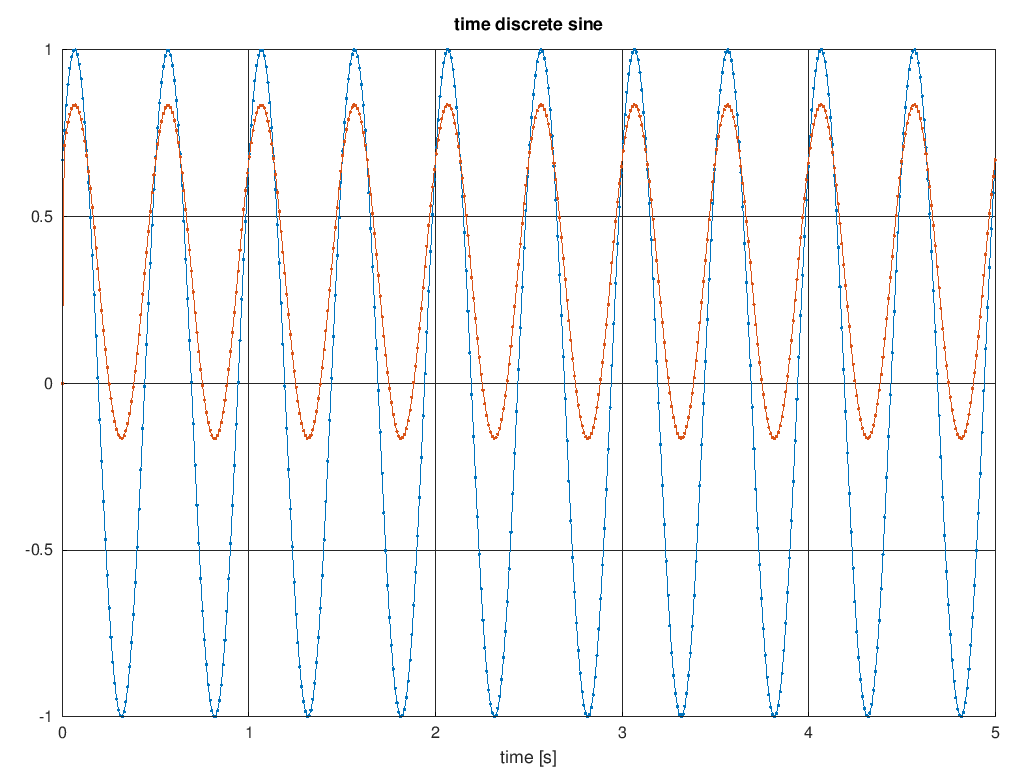

In [694]:
figure(fig++);
hold on
plot(t,y,"- .");
plot(t,get_movavrg(y),"- .");
hold off
grid on;
title("time discrete sine");
xlabel("time [s]");

## sample Signal with a ideal ADC

In [695]:
span=range(y);
bits=4;
LSB=span./(2.^bits.-1);
dy=round((y.+(span./2))./LSB);
min(dy)
max(dy)
SNR=snr_expected(bits)
mean=get_mean(dy)
get_mean2(dy)

ans = 0
ans =  15
SNR =  25.848
mean =  7.5020
ans = -2300.5


In [696]:
rms=sqrt(sum((dy.^2)./nos))
rms=my_rootmeansquare(dy)
sig_power=dy.^2;
sum(sig_power)./nos
max(sig_power)
mean=sum(dy)./nos
mean=get_mean(dy)
get_mean2(dy)
stddev=my_standarddeviation(dy)

rms =  9.2099
rms =  9.2099
ans =  84.822
ans =  225
mean =  7.5020
mean =  7.5020
ans = -2300.5
stddev =  5.3478


## time discrete sine
discrete amplitude resolution

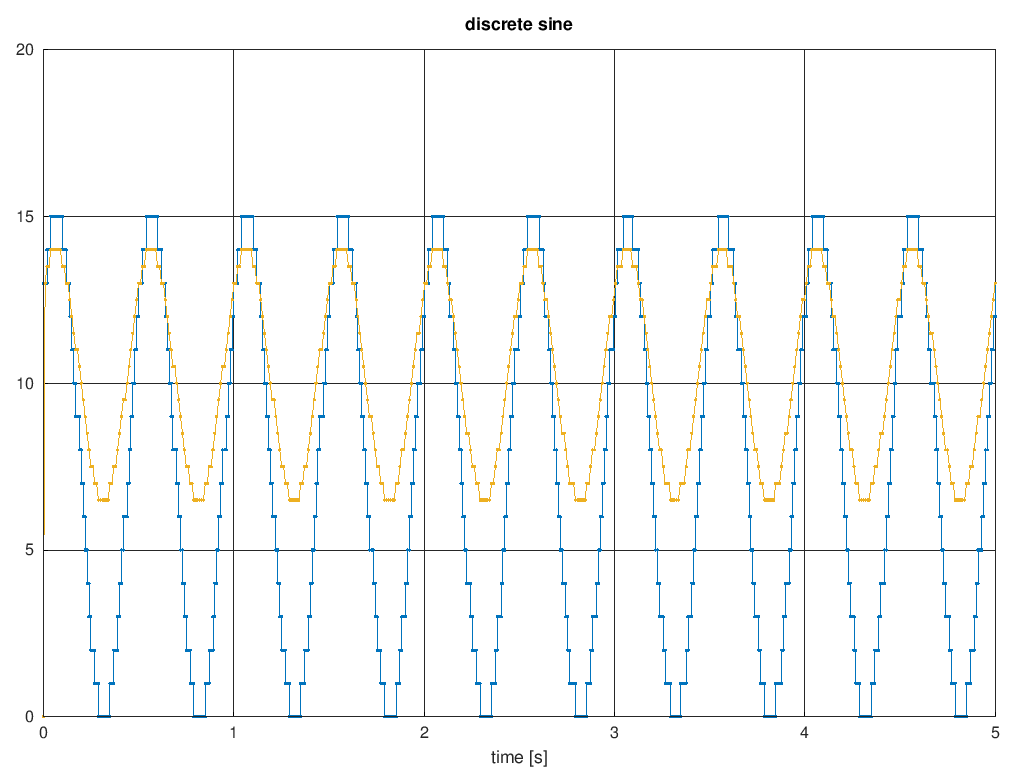

In [697]:
figure(fig++);
hold on
stairs(t,dy,"- .");
plot(t,get_movavrg(dy),"- .");
hold off
grid on;
title("discrete sine");
xlabel("time [s]");

## ADC alternate implementation

In [698]:
%%file my_quantisize.m

## usage: result=my_quantisize(data,bits_steps,asbits)
## Returns data quantisized with the given number of bits
function result=my_quantisize(data,bits_steps,asbits)
  if(asbits != 0)
    levels=2.^bits_steps;
  else
    levels=bits_steps;
  endif  
  offset=min(data);
  span=range(data);
  lsb=span./(levels.-1);
    
  %If all Samples have the same Value
  if(span==0)
    offset=0;
    %get absolut value of one Sample
    span=max(abs(data(1)));
    %If all Samples are zeros
    if(span==0)
      %no quantisation at all!
      result = data;
      return;
    endif
  endif
  
  data=data.-offset;    
  result=round(data./lsb);
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_quantisize.m'.


In [699]:
dy=my_quantisize(y,bits,1);
min(dy)
max(dy)

ans = 0
ans =  15


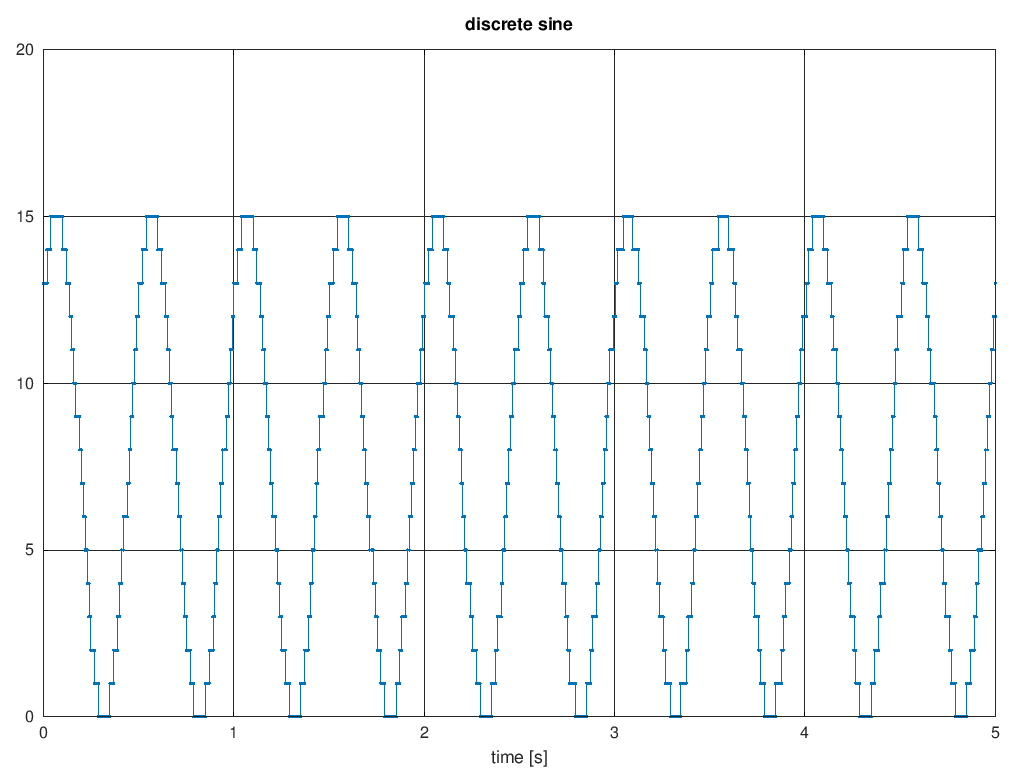

In [700]:
figure(fig++);
stairs(t,dy,"- .");
grid on;
title("discrete sine");
xlabel("time [s]");

## Zero / Mean-Extend Signal-Length to power of 2

In [701]:
nos2=2^ceil(log2(nos));
znos=nos2.-nos;
ze=ones(1,znos).*get_mean(dy);
dy = [dy ze];

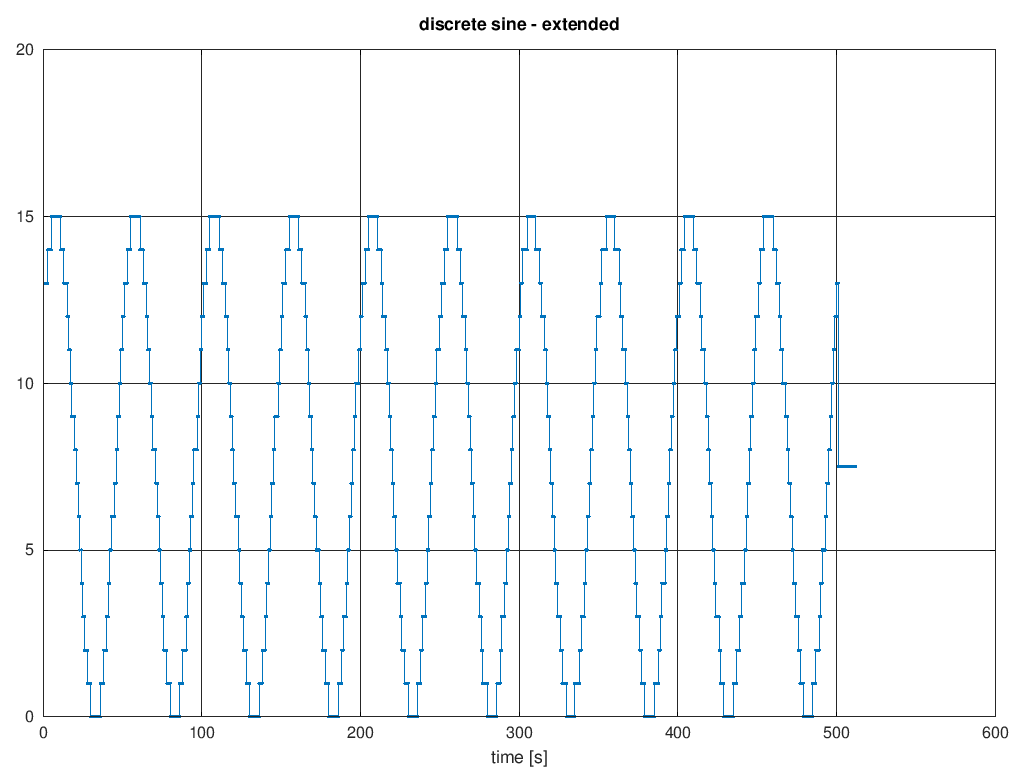

In [702]:
figure(fig++);
stairs(dy,"- .");
grid on;
title("discrete sine - extended");
xlabel("time [s]");

## Calculate and plot the Spectrum (frequency domain) of the signal

In [703]:
f=linspace(0,fs,nos2)(1:1:(nos2/2));
fmin=min(f)
fmax=max(f)
s=(2./nos2).*LSB.*abs(fft(dy)(1:1:(nos2/2)));
s(1)=0; #set DC to zero
s(2)=0;
s(3)=0;
max(s) 
#Get value of fundamental peak
lineresolution=fs./(2.*nos2)

fmin = 0
fmax =  49.902
ans =  0.88329
lineresolution =  0.097656


Positions of Harmonics

In [704]:
hpos=zeros(1,5);
for ii=1:1:length(hpos)
  hpos(:,ii)=harmonic_pos_calc(nos2,fs,fsig,ii.-1);
endfor
hpos

hpos =

    20    41    61    82   102



Extract Value / Amplitude of Harmonics

In [705]:
hamp=zeros(1,length(hpos));
for ii=1:1:length(hpos)
  hamp(:,ii)=harmonic_extract(s,hpos(:,ii),2.*LSB);
endfor
hamp

hamp =

   0.0349072   0.0043170   0.0073899   0.0014833   0.0051831



### Plot of spectrum

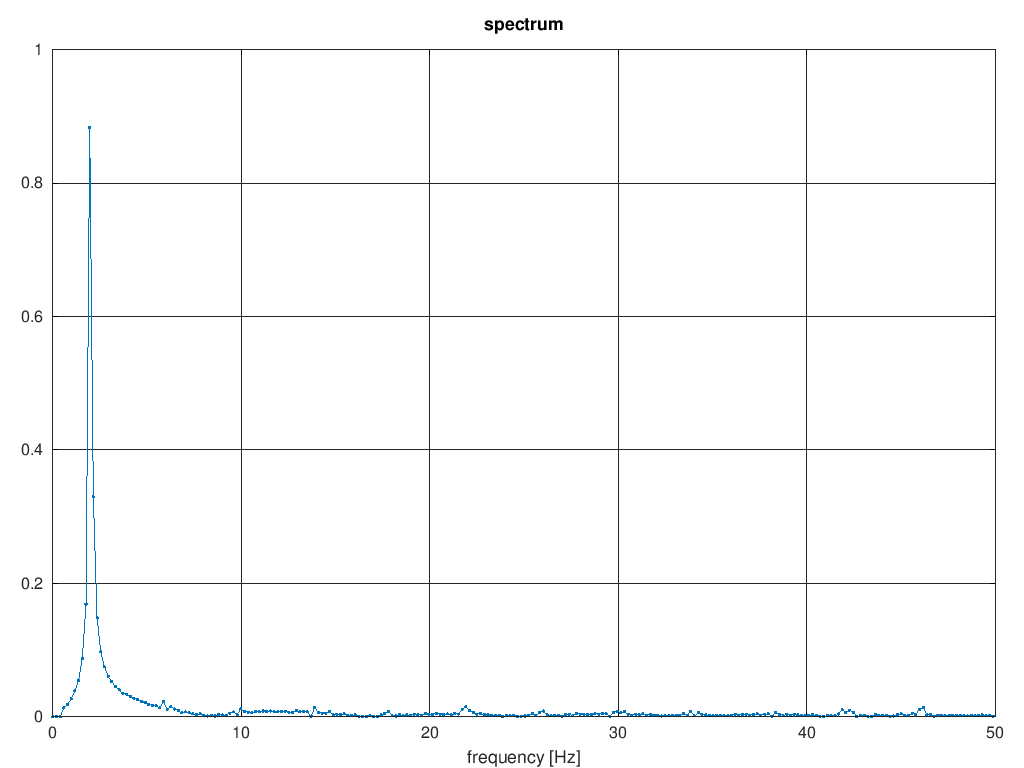

In [706]:
figure(fig++);
plot(f,s,"-d.");
grid on;
title("spectrum");
xlabel("frequency [Hz]");

### logarithmic scaled amplitude spectrum in dB

ans = -1.0779


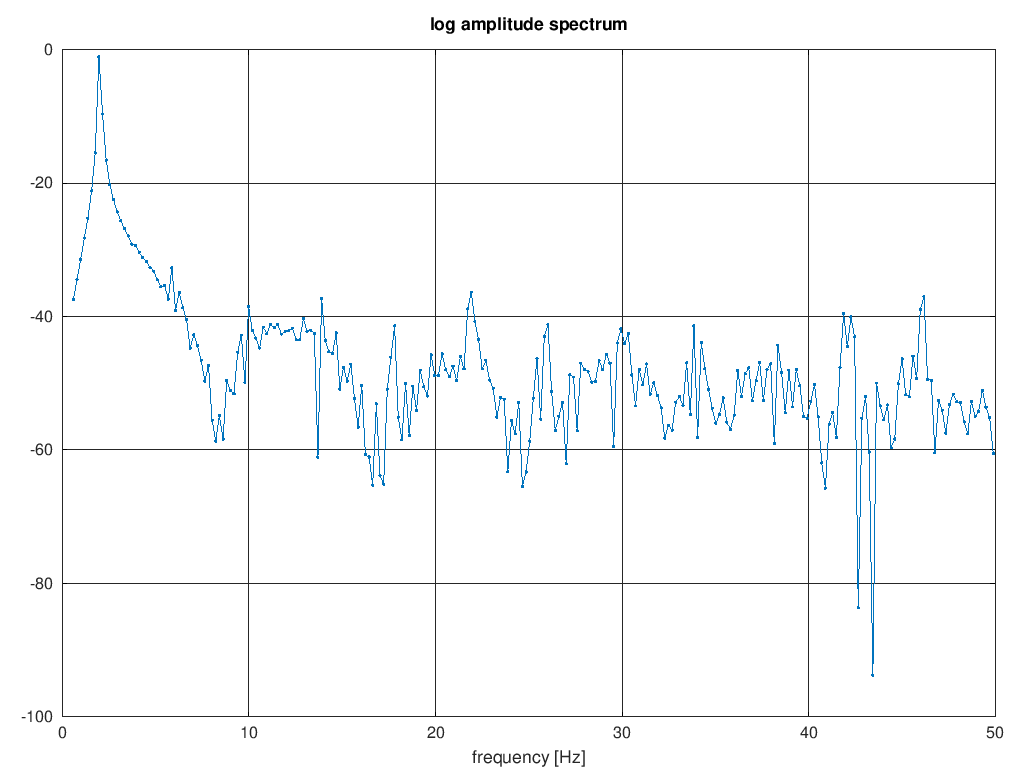

In [707]:
figure(fig++);
sl=20.*log10(s);
max(sl) #Get value of fundamental peak
plot(f,sl,"-d.");
grid on;
title("log amplitude spectrum");
xlabel("frequency [Hz]");

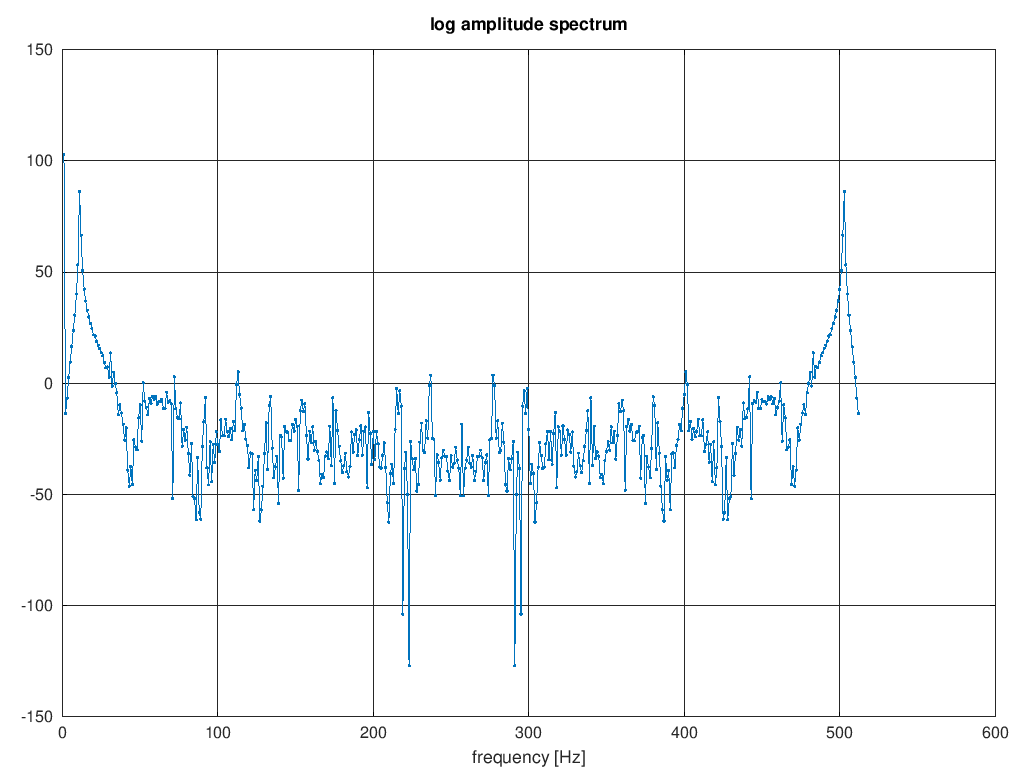

In [708]:
figure(fig++);
plot(tospectrum(dy),"-d.");
grid on;
title("log amplitude spectrum");
xlabel("frequency [Hz]");

## Window Function

In [709]:
w_hann=0.5*(1-cos(2*pi*(0:1:(nos2-1))/(nos2-1)));
CPG_Hanning=(1./nos2.*sum(w_hann)).^2

CPG_Hanning =  0.24902


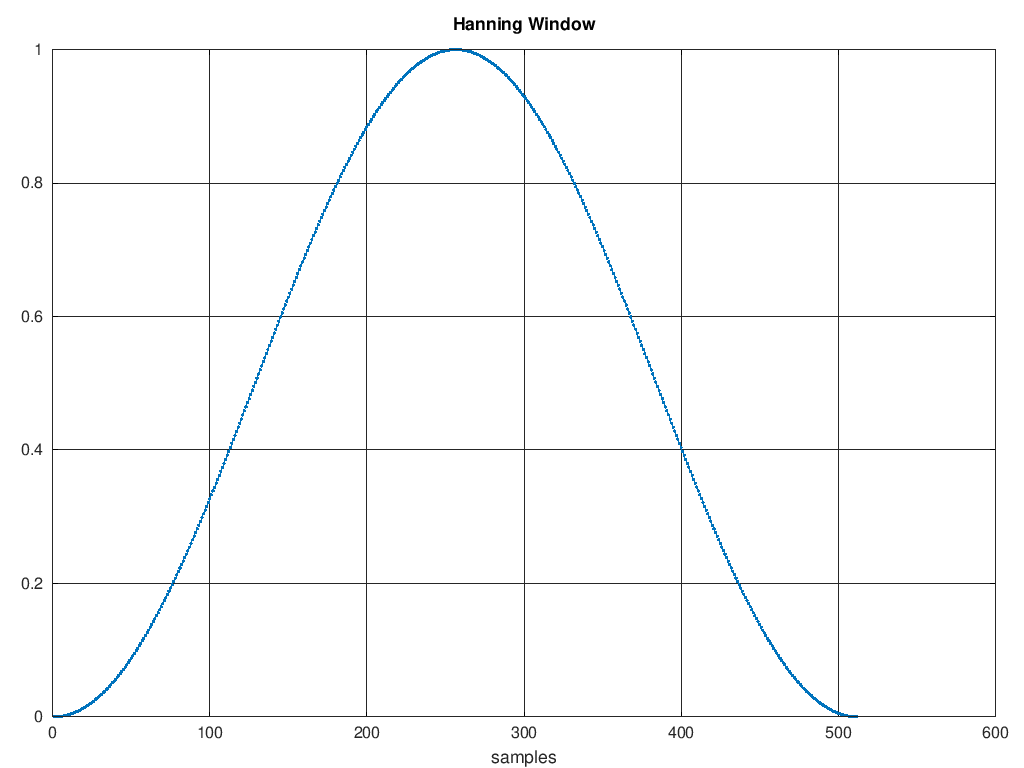

In [710]:
figure(fig++);
plot(w_hann,"-d.");
grid on;
title("Hanning Window");
xlabel("samples");

In [711]:
%%file my_apply_window.m

function result=my_apply_window(data,wnd)
  w1 = wnd.*0.5.+0.5;
  w2 = (1.-wnd).*0.5;
  
  woff = min(data) + (range(data)./2);
  result=data.*w1;
  result=result.+(w2.*woff);
  
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_apply_window.m'.


In [712]:
dz = my_apply_window(dy,w_hann);

In [713]:
rms=sqrt(sum((dz.^2)./nos))
rms=my_rootmeansquare(dz)
sig_power=dz.^2;
sum(sig_power)./nos
max(sig_power)
mean=sum(dz)./nos
mean=get_mean(dz)
get_mean2(dz)
stddev=my_standarddeviation(dz)

rms =  8.6453
rms =  8.5433
ans =  74.740
ans =  225.00
mean =  7.6776
mean =  7.4977
ans = -795.84
stddev =  4.0995


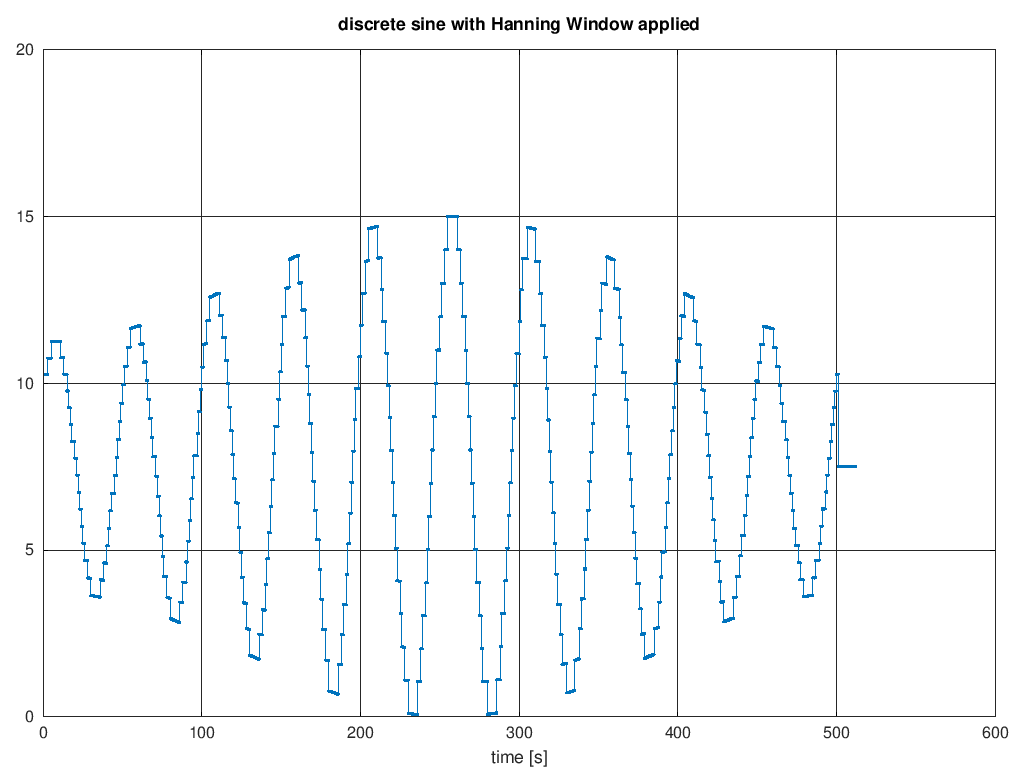

In [714]:
figure(fig++);
stairs(dz,"- .");
grid on;
title("discrete sine with Hanning Window applied");
xlabel("time [s]");

## Spectrum of windowed signal

In [715]:
f=linspace(0,fs,nos2)(1:1:(nos2/2));
fmin=min(f)
fmax=max(f)
wnd_corr_ampl = 2.0317;
s=wnd_corr_ampl.*(2./nos2).*LSB.*abs(fft(dz)(1:1:(nos2/2)));
s(1)=0; #set DC to zero
s(2)=0;
s(3)=0;
max(s) 
#Get value of fundamental peak
lineresolution=fs./(2.*nos2)

fmin = 0
fmax =  49.902
ans =  1.3859
lineresolution =  0.097656


In [716]:
### Plot of spectrum

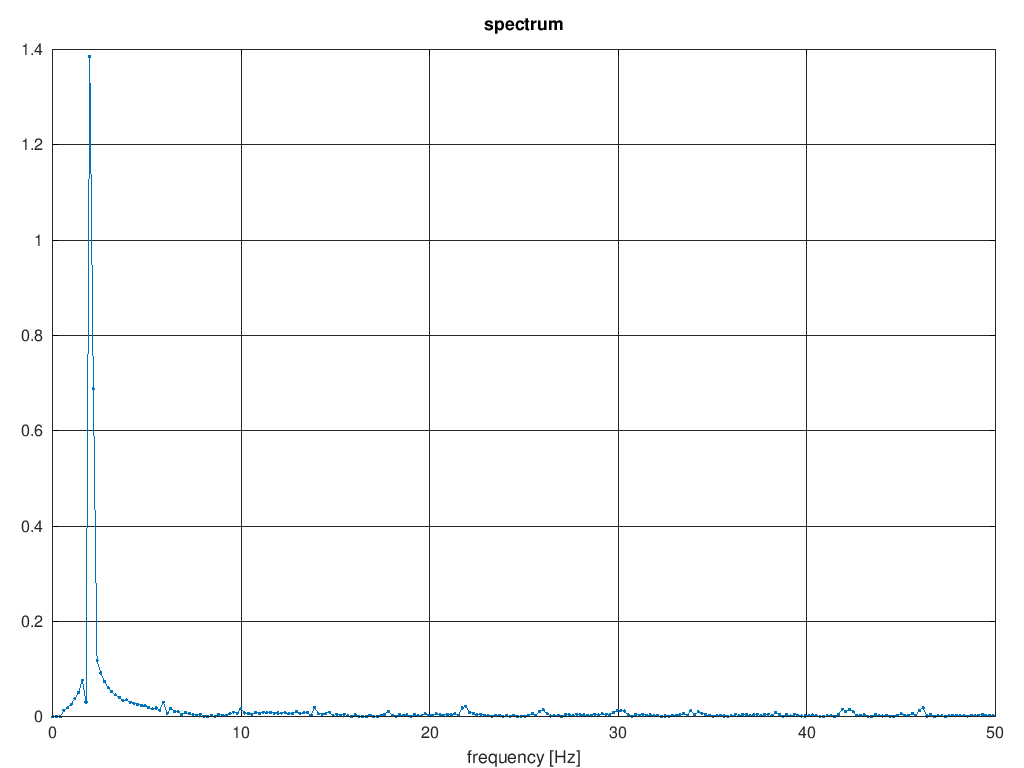

In [717]:
figure(fig++);
plot(f,s,"-d.");
grid on;
title("spectrum");
xlabel("frequency [Hz]");

In [718]:
### logarithmic scaled amplitude spectrum in dB

ans =  2.8344


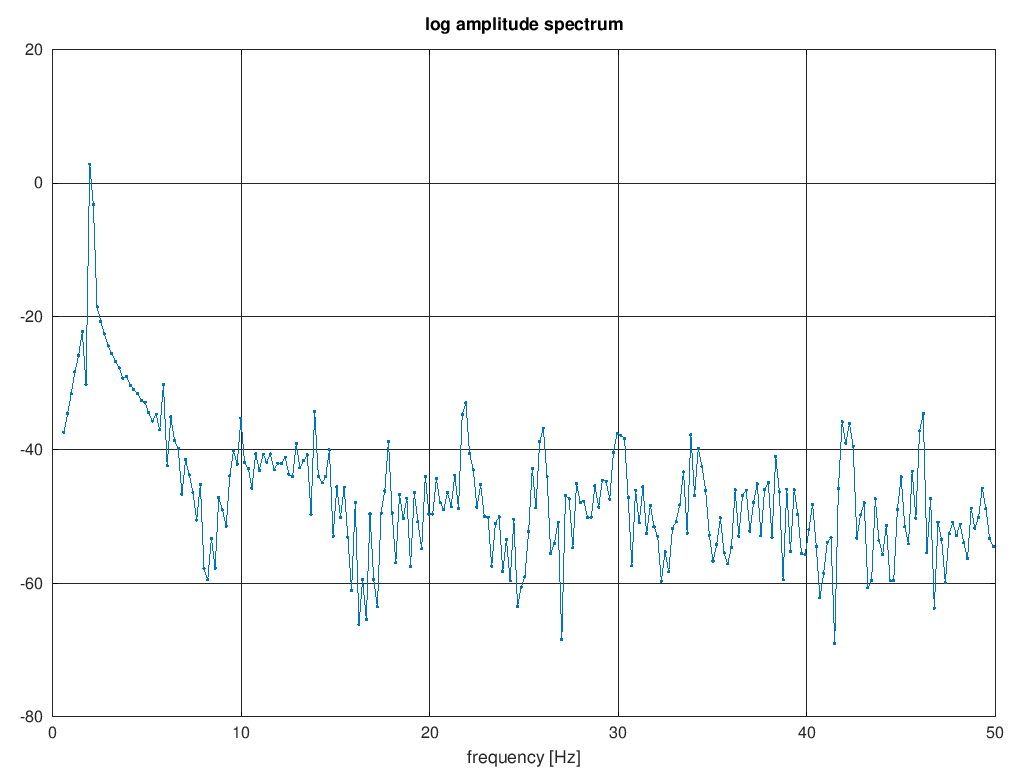

In [719]:
figure(fig++);
sl=20.*log10(s);
max(sl) #Get value of fundamental peak
plot(f,sl,"-d.");
grid on;
title("log amplitude spectrum");
xlabel("frequency [Hz]");

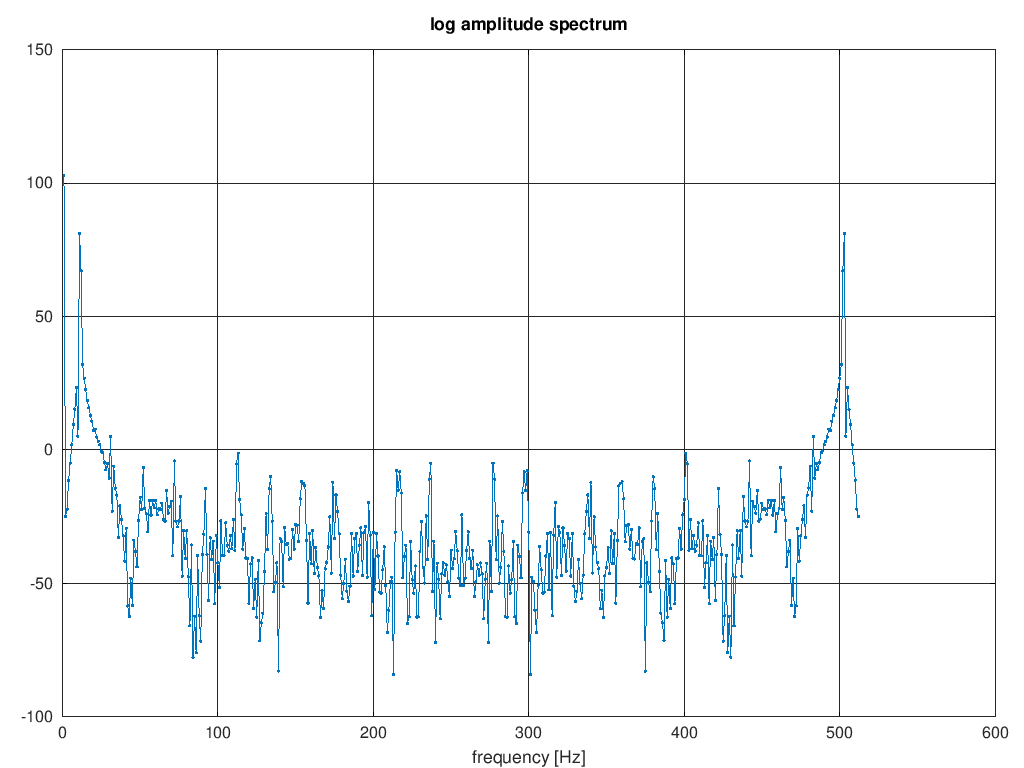

In [720]:
figure(fig++);
plot(tospectrum(dz),"-d.");
grid on;
title("log amplitude spectrum");
xlabel("frequency [Hz]");

## power spectrum

In [721]:
%%file my_powerspectrum.m

#input:  N real time domain samples (time_signal)
#output: N/2 point power spectrum
function result=my_powerspectrum(time_signal,nos)
  twosided_fft           = (1./nos).*abs(fft(time_signal,nos)); % do fft
  onesided_fft(1)        = twosided_fft(1);                     % copy DC bin
  onesided_fft(2:nos./2) = 2 * twosided_fft(2:(nos./2));        % double other
  binspower_fft          = onesided_fft.^2;                     % convert from RMS to power
  result = binspower_fft;
  return;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/my_powerspectrum.m'.


In [722]:
ps=my_powerspectrum(dz,nos);

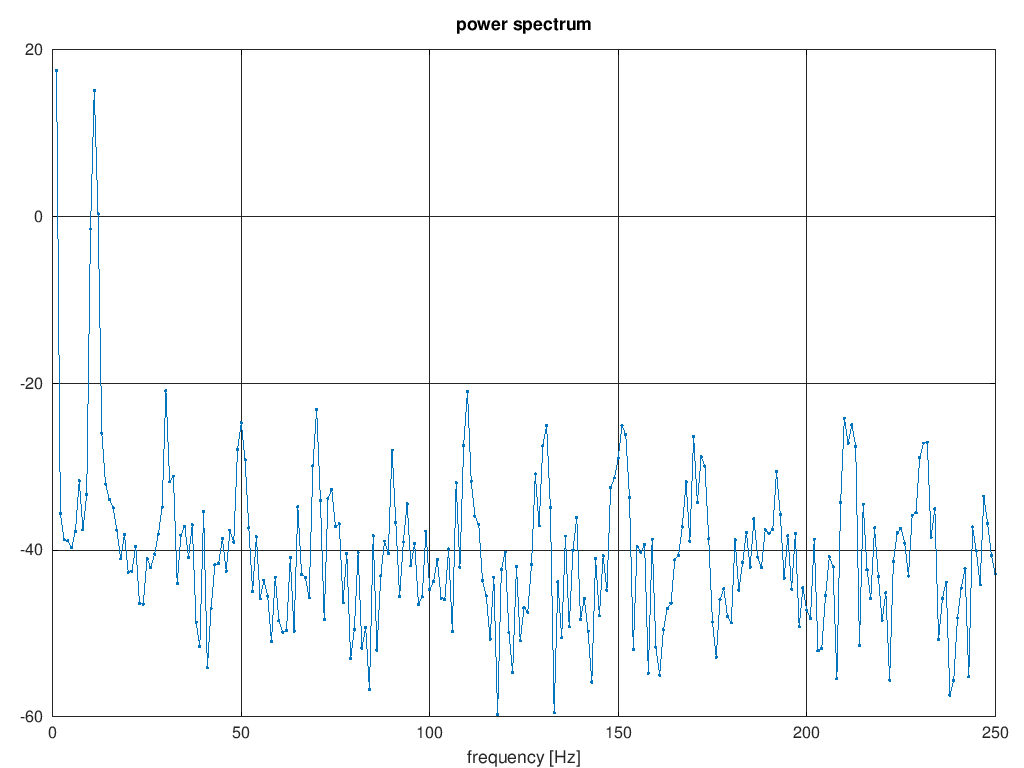

In [723]:
figure(fig++);
plot(10.*log10(ps),"-d.");
grid on;
title("power spectrum");
xlabel("frequency [Hz]");